# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

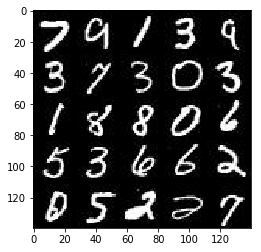

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

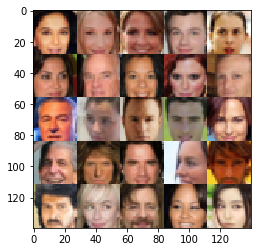

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels))
    z = tf.placeholder(tf.float32,shape=(None,z_dim))
    lr = tf.placeholder(tf.float32,shape=None)

    return real_input_images, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [48]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        alpha = 0.01
        # Input layer is 28x28x3
        
        x2 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        #print(x2.get_shape())
        x2 = tf.layers.batch_normalization(x2,training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        x5 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        #print(x5.get_shape())
        x5 = tf.layers.batch_normalization(x5,training=True)
        x5 = tf.maximum(alpha * x5, x5)
        #7x7x256
        
        x6 = tf.layers.conv2d(x5, 512, 5, strides=2, padding='same')
        #print(x6.get_shape())
        x6 = tf.layers.batch_normalization(x6,training=True)
        x6 = tf.maximum(alpha * x6, x6)
        
        # Flatten it
        flat = tf.reshape(x5, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        out = tf.nn.dropout(out,keep_prob=0.95)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [47]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        alpha = 0.1
        x1 = tf.layers.dense(z,7*7*512)
        #reshaping to 4d tensor
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape())
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        
        
        logits = tf.layers.conv2d_transpose(x2,out_channel_dim,5,strides=2,padding='same')
        #print(logits.get_shape())
        #28x28x5
        out = tf.tanh(logits)        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [49]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z,out_channel_dim)
    dis_model_real,dis_logits_real = discriminator(input_real)
    dis_model_fake,dis_logits_fake = discriminator(gen_model,True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real,labels=0.9 * tf.ones_like(dis_model_real)))
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake,labels=tf.zeros_like(dis_model_fake)))
    dis_loss = dis_loss_real + dis_loss_fake
        
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake,labels=tf.ones_like(dis_model_fake)))
    
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [50]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    model_vars = tf.trainable_variables()
    gen_vars = [v1 for v1 in model_vars if v1.name.startswith('generator')]
    dis_vars = [v1 for v1 in model_vars if v1.name.startswith('discriminator')]

    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [51]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [52]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    show_every = 50
    print_every = 10
    print(data_shape)
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, len(data_image_mode))
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        losses = []
        step = 0 
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                #print(batch_images)
                step = step+1
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real:batch_images, input_z:batch_z,lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})


                if step % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if step % show_every == 0:
                    show_generator_output(sess,20,input_z,data_shape[3],data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 4.0932... Generator Loss: 0.0318
Epoch 1/2... Discriminator Loss: 2.0795... Generator Loss: 0.6152
Epoch 1/2... Discriminator Loss: 2.0735... Generator Loss: 0.3008
Epoch 1/2... Discriminator Loss: 2.2024... Generator Loss: 0.2172
Epoch 1/2... Discriminator Loss: 2.1370... Generator Loss: 0.2158


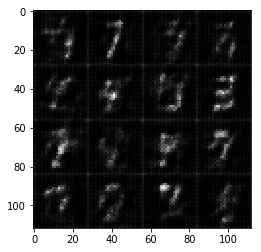

Epoch 1/2... Discriminator Loss: 2.0395... Generator Loss: 0.2386
Epoch 1/2... Discriminator Loss: 1.8415... Generator Loss: 0.3231
Epoch 1/2... Discriminator Loss: 1.7863... Generator Loss: 0.3188
Epoch 1/2... Discriminator Loss: 1.8116... Generator Loss: 0.3216
Epoch 1/2... Discriminator Loss: 1.9975... Generator Loss: 0.2394


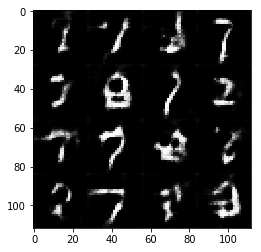

Epoch 1/2... Discriminator Loss: 1.8543... Generator Loss: 0.2915
Epoch 1/2... Discriminator Loss: 1.7705... Generator Loss: 0.3144
Epoch 1/2... Discriminator Loss: 1.8135... Generator Loss: 0.3038
Epoch 1/2... Discriminator Loss: 1.7648... Generator Loss: 0.3266
Epoch 1/2... Discriminator Loss: 1.9793... Generator Loss: 0.2402


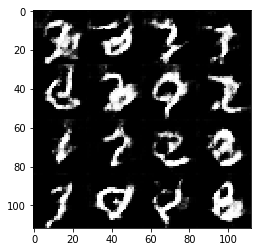

Epoch 1/2... Discriminator Loss: 1.5882... Generator Loss: 0.4861
Epoch 1/2... Discriminator Loss: 1.7947... Generator Loss: 0.3085
Epoch 1/2... Discriminator Loss: 1.8290... Generator Loss: 0.3088
Epoch 1/2... Discriminator Loss: 1.7422... Generator Loss: 0.3421
Epoch 1/2... Discriminator Loss: 1.8405... Generator Loss: 0.2871


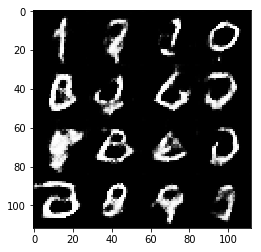

Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.4419
Epoch 1/2... Discriminator Loss: 1.8004... Generator Loss: 0.3029
Epoch 1/2... Discriminator Loss: 1.7480... Generator Loss: 0.3533
Epoch 1/2... Discriminator Loss: 1.6694... Generator Loss: 0.3931
Epoch 1/2... Discriminator Loss: 1.7576... Generator Loss: 0.3384


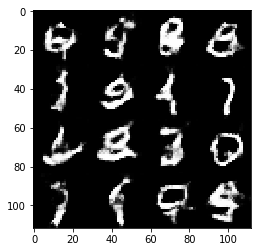

Epoch 1/2... Discriminator Loss: 1.5893... Generator Loss: 0.4431
Epoch 1/2... Discriminator Loss: 1.6201... Generator Loss: 0.4564
Epoch 1/2... Discriminator Loss: 1.8157... Generator Loss: 0.3133
Epoch 1/2... Discriminator Loss: 1.7609... Generator Loss: 0.3263
Epoch 1/2... Discriminator Loss: 1.7688... Generator Loss: 0.3204


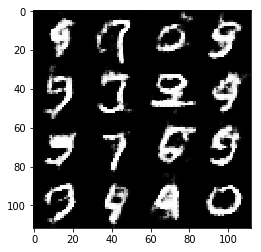

Epoch 1/2... Discriminator Loss: 1.7604... Generator Loss: 0.3215
Epoch 1/2... Discriminator Loss: 1.8677... Generator Loss: 0.2700
Epoch 1/2... Discriminator Loss: 1.5843... Generator Loss: 0.4759
Epoch 1/2... Discriminator Loss: 1.5557... Generator Loss: 0.8630
Epoch 1/2... Discriminator Loss: 1.5399... Generator Loss: 0.5347


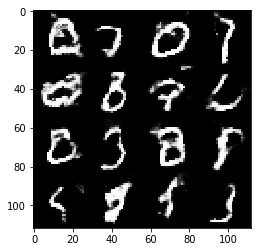

Epoch 1/2... Discriminator Loss: 1.7704... Generator Loss: 0.3205
Epoch 1/2... Discriminator Loss: 1.7350... Generator Loss: 0.3249
Epoch 1/2... Discriminator Loss: 1.5990... Generator Loss: 0.4038
Epoch 1/2... Discriminator Loss: 1.5237... Generator Loss: 0.5032
Epoch 1/2... Discriminator Loss: 1.8433... Generator Loss: 0.2836


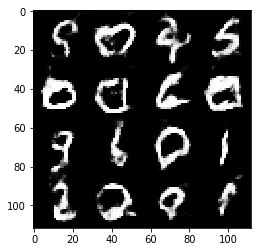

Epoch 1/2... Discriminator Loss: 1.7086... Generator Loss: 0.3541
Epoch 1/2... Discriminator Loss: 1.8094... Generator Loss: 0.2927
Epoch 1/2... Discriminator Loss: 1.6023... Generator Loss: 0.4364
Epoch 1/2... Discriminator Loss: 1.6970... Generator Loss: 0.3699
Epoch 1/2... Discriminator Loss: 1.3913... Generator Loss: 0.6747


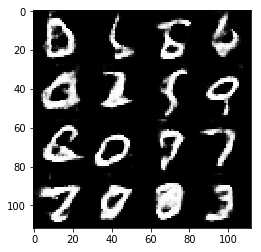

Epoch 1/2... Discriminator Loss: 2.1620... Generator Loss: 1.8641
Epoch 1/2... Discriminator Loss: 1.5894... Generator Loss: 1.2984
Epoch 1/2... Discriminator Loss: 1.4388... Generator Loss: 1.0068
Epoch 1/2... Discriminator Loss: 1.5156... Generator Loss: 1.2633
Epoch 1/2... Discriminator Loss: 1.3911... Generator Loss: 0.7510


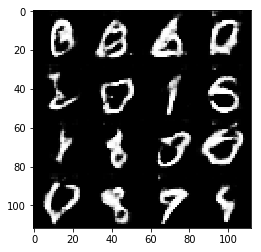

Epoch 1/2... Discriminator Loss: 1.5226... Generator Loss: 1.2345
Epoch 1/2... Discriminator Loss: 1.5446... Generator Loss: 1.2459
Epoch 1/2... Discriminator Loss: 1.3751... Generator Loss: 0.6716
Epoch 1/2... Discriminator Loss: 1.5109... Generator Loss: 1.0572
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 1.2381


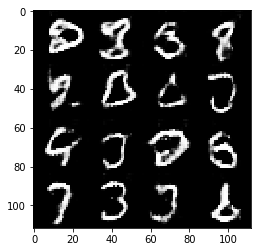

Epoch 1/2... Discriminator Loss: 1.6162... Generator Loss: 1.3405
Epoch 1/2... Discriminator Loss: 1.3528... Generator Loss: 0.8647
Epoch 1/2... Discriminator Loss: 1.6183... Generator Loss: 0.3725
Epoch 1/2... Discriminator Loss: 1.6058... Generator Loss: 0.3723
Epoch 1/2... Discriminator Loss: 1.3295... Generator Loss: 0.5885


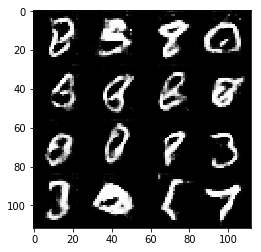

Epoch 1/2... Discriminator Loss: 1.5252... Generator Loss: 1.3609
Epoch 1/2... Discriminator Loss: 1.4134... Generator Loss: 0.9916
Epoch 1/2... Discriminator Loss: 1.4019... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 1.3391... Generator Loss: 0.6980
Epoch 1/2... Discriminator Loss: 2.1983... Generator Loss: 0.1808


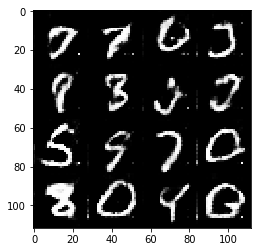

Epoch 1/2... Discriminator Loss: 1.4180... Generator Loss: 0.5330
Epoch 1/2... Discriminator Loss: 1.5852... Generator Loss: 0.3840
Epoch 1/2... Discriminator Loss: 1.3933... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 0.7922
Epoch 1/2... Discriminator Loss: 1.6134... Generator Loss: 1.7636


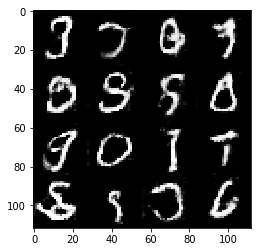

Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.8644
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 1.9470... Generator Loss: 1.8349
Epoch 1/2... Discriminator Loss: 1.3715... Generator Loss: 1.1699
Epoch 1/2... Discriminator Loss: 1.2158... Generator Loss: 0.9232


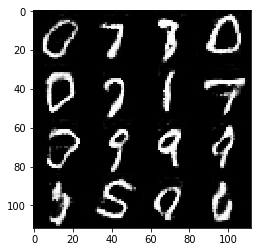

Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 1.2316
Epoch 1/2... Discriminator Loss: 1.2456... Generator Loss: 1.0151
Epoch 1/2... Discriminator Loss: 1.4996... Generator Loss: 1.5441
Epoch 1/2... Discriminator Loss: 1.5962... Generator Loss: 1.6406
Epoch 1/2... Discriminator Loss: 1.4020... Generator Loss: 0.5404


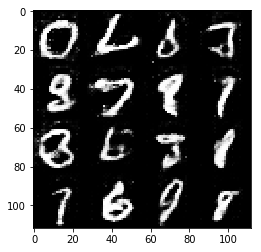

Epoch 1/2... Discriminator Loss: 1.4831... Generator Loss: 0.4139
Epoch 1/2... Discriminator Loss: 1.2717... Generator Loss: 0.6063
Epoch 1/2... Discriminator Loss: 1.3258... Generator Loss: 0.6747
Epoch 1/2... Discriminator Loss: 1.8261... Generator Loss: 0.2748
Epoch 1/2... Discriminator Loss: 1.6917... Generator Loss: 0.3099


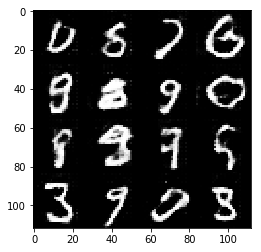

Epoch 1/2... Discriminator Loss: 1.3422... Generator Loss: 0.5445
Epoch 1/2... Discriminator Loss: 1.2654... Generator Loss: 0.6473
Epoch 1/2... Discriminator Loss: 1.3253... Generator Loss: 0.5945
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 1.4565
Epoch 1/2... Discriminator Loss: 1.2342... Generator Loss: 1.0676


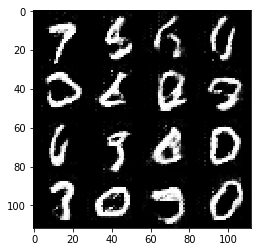

Epoch 1/2... Discriminator Loss: 1.2441... Generator Loss: 0.9284
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 1.7637
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 0.9281
Epoch 2/2... Discriminator Loss: 1.2391... Generator Loss: 0.6229
Epoch 2/2... Discriminator Loss: 1.9272... Generator Loss: 0.2478


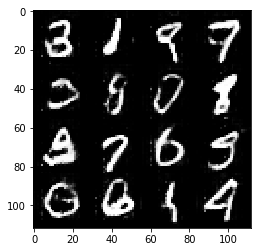

Epoch 2/2... Discriminator Loss: 1.4901... Generator Loss: 0.4239
Epoch 2/2... Discriminator Loss: 1.3812... Generator Loss: 0.6390
Epoch 2/2... Discriminator Loss: 1.2004... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 1.1431... Generator Loss: 1.3627
Epoch 2/2... Discriminator Loss: 1.6270... Generator Loss: 1.4055


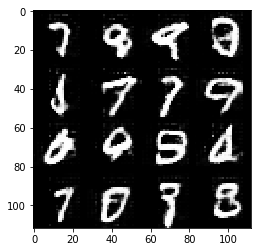

Epoch 2/2... Discriminator Loss: 1.4500... Generator Loss: 1.7160
Epoch 2/2... Discriminator Loss: 1.6578... Generator Loss: 0.3446
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 1.2289
Epoch 2/2... Discriminator Loss: 1.3109... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 1.5069... Generator Loss: 0.5228


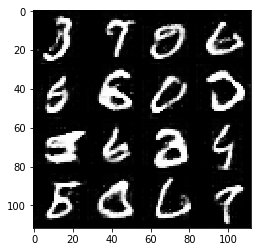

Epoch 2/2... Discriminator Loss: 1.5070... Generator Loss: 0.4813
Epoch 2/2... Discriminator Loss: 1.5599... Generator Loss: 0.3839
Epoch 2/2... Discriminator Loss: 1.3259... Generator Loss: 0.6939
Epoch 2/2... Discriminator Loss: 1.3383... Generator Loss: 0.6066
Epoch 2/2... Discriminator Loss: 1.3938... Generator Loss: 0.5099


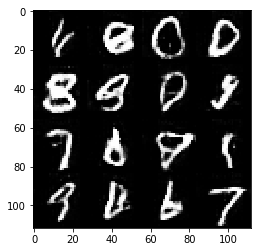

Epoch 2/2... Discriminator Loss: 1.4646... Generator Loss: 0.4497
Epoch 2/2... Discriminator Loss: 1.7822... Generator Loss: 0.3106
Epoch 2/2... Discriminator Loss: 1.2214... Generator Loss: 0.9816
Epoch 2/2... Discriminator Loss: 1.4675... Generator Loss: 1.6017
Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 0.8036


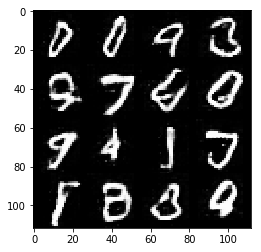

Epoch 2/2... Discriminator Loss: 1.1529... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 1.4547... Generator Loss: 1.1797
Epoch 2/2... Discriminator Loss: 1.6524... Generator Loss: 1.6465
Epoch 2/2... Discriminator Loss: 1.3569... Generator Loss: 0.7610
Epoch 2/2... Discriminator Loss: 1.2791... Generator Loss: 0.7291


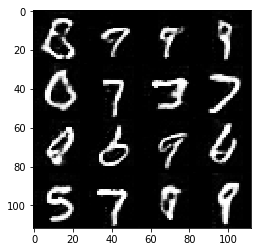

Epoch 2/2... Discriminator Loss: 1.6685... Generator Loss: 0.3680
Epoch 2/2... Discriminator Loss: 1.7189... Generator Loss: 0.3138
Epoch 2/2... Discriminator Loss: 1.5518... Generator Loss: 1.3187
Epoch 2/2... Discriminator Loss: 1.3894... Generator Loss: 0.9789
Epoch 2/2... Discriminator Loss: 1.2218... Generator Loss: 0.9819


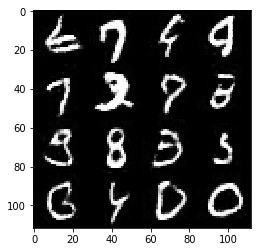

Epoch 2/2... Discriminator Loss: 1.3638... Generator Loss: 1.2133
Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.7852
Epoch 2/2... Discriminator Loss: 1.2856... Generator Loss: 0.6642
Epoch 2/2... Discriminator Loss: 1.7298... Generator Loss: 0.4975
Epoch 2/2... Discriminator Loss: 1.8112... Generator Loss: 0.2950


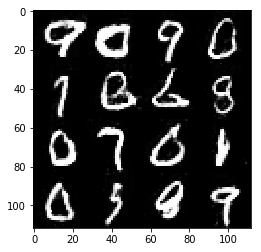

Epoch 2/2... Discriminator Loss: 1.6563... Generator Loss: 0.3351
Epoch 2/2... Discriminator Loss: 1.4541... Generator Loss: 0.4582
Epoch 2/2... Discriminator Loss: 1.3679... Generator Loss: 0.9673
Epoch 2/2... Discriminator Loss: 1.3511... Generator Loss: 0.7429
Epoch 2/2... Discriminator Loss: 1.8861... Generator Loss: 0.2537


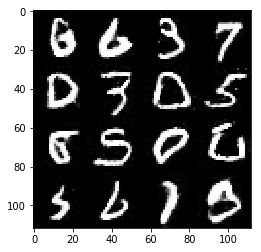

Epoch 2/2... Discriminator Loss: 1.6246... Generator Loss: 0.3654
Epoch 2/2... Discriminator Loss: 1.6554... Generator Loss: 0.3431
Epoch 2/2... Discriminator Loss: 1.5895... Generator Loss: 0.3651
Epoch 2/2... Discriminator Loss: 1.3335... Generator Loss: 0.5479
Epoch 2/2... Discriminator Loss: 1.4027... Generator Loss: 0.7439


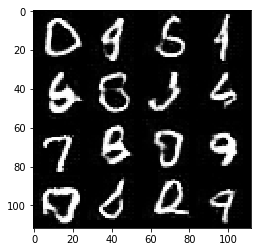

Epoch 2/2... Discriminator Loss: 1.2444... Generator Loss: 0.6921
Epoch 2/2... Discriminator Loss: 1.4941... Generator Loss: 0.4571
Epoch 2/2... Discriminator Loss: 1.7556... Generator Loss: 0.3011
Epoch 2/2... Discriminator Loss: 1.6137... Generator Loss: 0.3598
Epoch 2/2... Discriminator Loss: 1.4005... Generator Loss: 0.5371


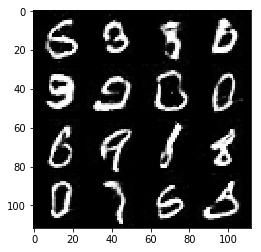

Epoch 2/2... Discriminator Loss: 1.2368... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.3964... Generator Loss: 1.3809
Epoch 2/2... Discriminator Loss: 1.3068... Generator Loss: 0.9240


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
Epoch 1/1... Discriminator Loss: 0.7761... Generator Loss: 4.1964
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.5341
Epoch 1/1... Discriminator Loss: 1.1026... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.4512


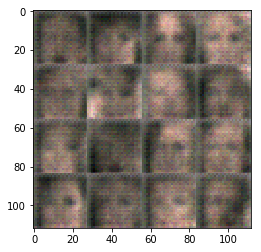

Epoch 1/1... Discriminator Loss: 1.6917... Generator Loss: 0.2938
Epoch 1/1... Discriminator Loss: 1.8065... Generator Loss: 0.2974
Epoch 1/1... Discriminator Loss: 1.7570... Generator Loss: 4.0159
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.4722
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.4992


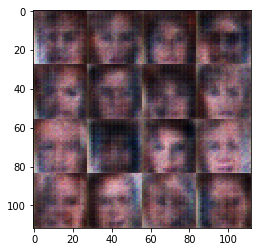

Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 1.1987
Epoch 1/1... Discriminator Loss: 1.8407... Generator Loss: 0.2524
Epoch 1/1... Discriminator Loss: 1.7553... Generator Loss: 0.2918
Epoch 1/1... Discriminator Loss: 1.6340... Generator Loss: 0.2938
Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.3976


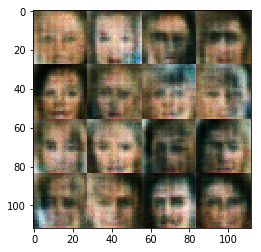

Epoch 1/1... Discriminator Loss: 2.7524... Generator Loss: 0.0822
Epoch 1/1... Discriminator Loss: 1.7384... Generator Loss: 0.2592
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 0.9605
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.1239
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 1.5325


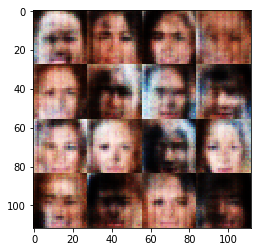

Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.4353
Epoch 1/1... Discriminator Loss: 1.2032... Generator Loss: 1.9999
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 1.1800
Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 1.8065
Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.8455


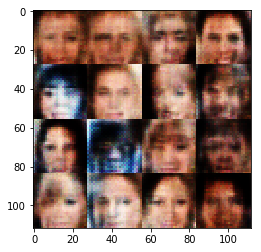

Epoch 1/1... Discriminator Loss: 1.5312... Generator Loss: 1.0066
Epoch 1/1... Discriminator Loss: 1.5353... Generator Loss: 2.1564
Epoch 1/1... Discriminator Loss: 1.5074... Generator Loss: 1.1848
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 4.5103


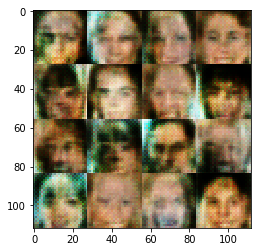

Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.9700
Epoch 1/1... Discriminator Loss: 1.2745... Generator Loss: 2.1661
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 1.0054
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 1.3217
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 0.8598


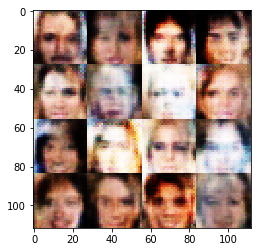

Epoch 1/1... Discriminator Loss: 1.1317... Generator Loss: 3.6937
Epoch 1/1... Discriminator Loss: 1.9107... Generator Loss: 0.2077
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 0.9533... Generator Loss: 1.7605
Epoch 1/1... Discriminator Loss: 1.2227... Generator Loss: 0.7505


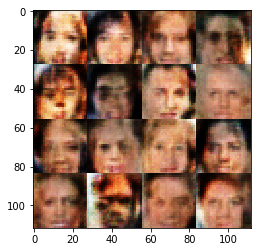

Epoch 1/1... Discriminator Loss: 0.5606... Generator Loss: 2.5949
Epoch 1/1... Discriminator Loss: 1.1988... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 3.1230
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 0.7006... Generator Loss: 2.1607


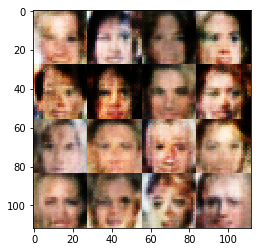

Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.5616
Epoch 1/1... Discriminator Loss: 0.8824... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.4236
Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.4345
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 2.7575


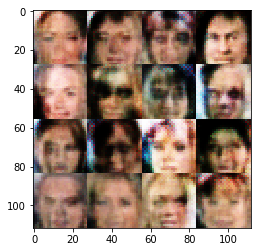

Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 1.2580
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.5209
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 0.9605
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 1.7600


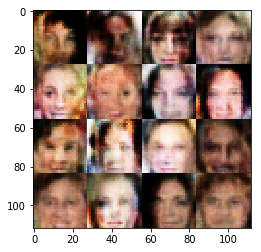

Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 1.6796
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.5909
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 1.0679
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 3.6833


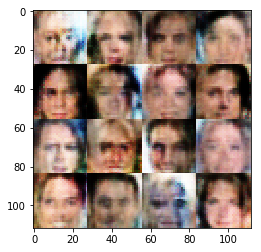

Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.8626
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 0.7043... Generator Loss: 2.3370
Epoch 1/1... Discriminator Loss: 0.6681... Generator Loss: 3.0696
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.1394


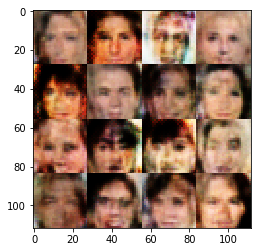

Epoch 1/1... Discriminator Loss: 1.0356... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 2.0104... Generator Loss: 2.3421
Epoch 1/1... Discriminator Loss: 2.0252... Generator Loss: 0.1816
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 0.9178


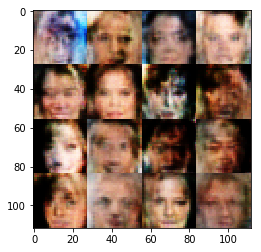

Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.1949... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.3787
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.1826... Generator Loss: 0.6762


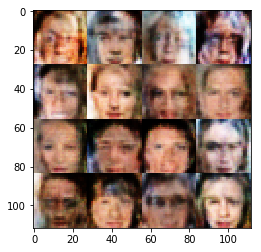

Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 1.6967
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.3924
Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.3614
Epoch 1/1... Discriminator Loss: 1.7080... Generator Loss: 3.1953


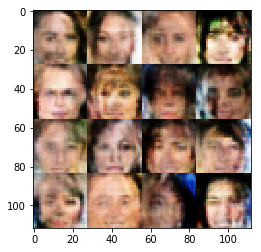

Epoch 1/1... Discriminator Loss: 0.7727... Generator Loss: 1.7283
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 0.9007
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 1.1304
Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.4780


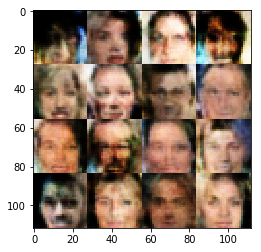

Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 1.2718
Epoch 1/1... Discriminator Loss: 1.8997... Generator Loss: 1.6528
Epoch 1/1... Discriminator Loss: 1.0411... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.7479
Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 0.7886


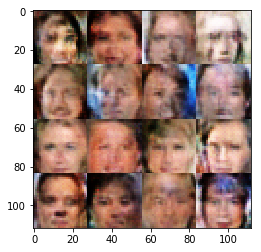

Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 1.3647
Epoch 1/1... Discriminator Loss: 1.2045... Generator Loss: 1.6210
Epoch 1/1... Discriminator Loss: 0.7826... Generator Loss: 1.4984
Epoch 1/1... Discriminator Loss: 1.5554... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.9983


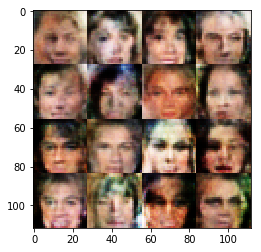

Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 1.5705
Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 1.5090
Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 1.3812
Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 1.0430
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.7368


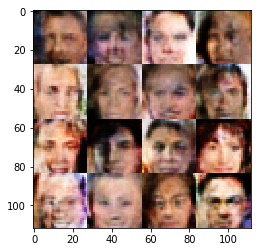

Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.6115... Generator Loss: 0.3317
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 1.4494
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.6581


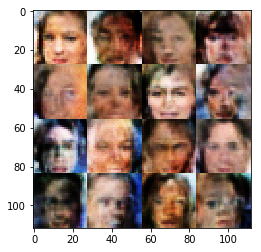

Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 1.3105
Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 0.4224
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 1.1122... Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.5477... Generator Loss: 0.3435


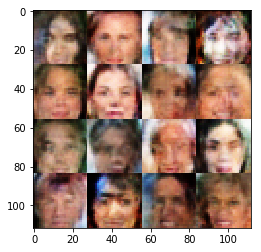

Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.4693
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.5076
Epoch 1/1... Discriminator Loss: 1.7405... Generator Loss: 1.6323


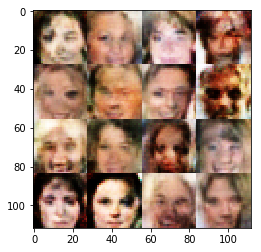

Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 0.7283


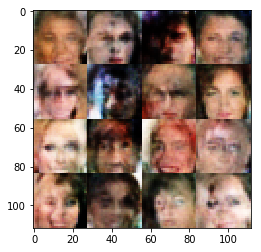

Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.3688
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.1491... Generator Loss: 1.2206
Epoch 1/1... Discriminator Loss: 0.8650... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 1.2434... Generator Loss: 1.1923


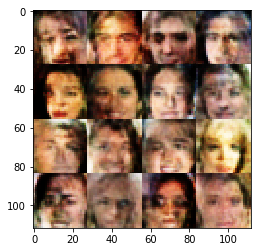

Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.3706
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 0.9212
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.1796... Generator Loss: 0.5583


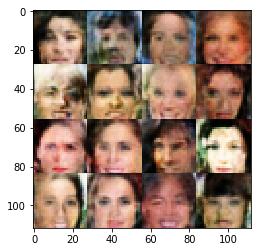

Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.9212
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 1.0888
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.5648
Epoch 1/1... Discriminator Loss: 1.0180... Generator Loss: 1.3603
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 1.2680


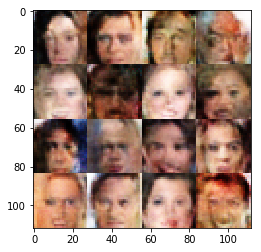

Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.4625
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 0.4758
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 1.2737


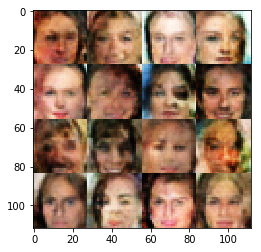

Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 0.9746
Epoch 1/1... Discriminator Loss: 1.5585... Generator Loss: 1.6105


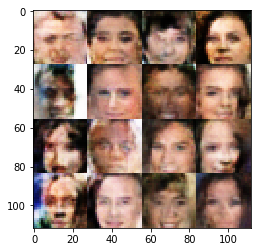

Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 1.0322
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 1.2968
Epoch 1/1... Discriminator Loss: 1.0685... Generator Loss: 1.1010


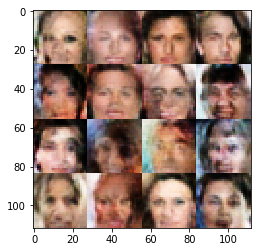

Epoch 1/1... Discriminator Loss: 1.1652... Generator Loss: 0.8094
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 1.2600
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 1.0834
Epoch 1/1... Discriminator Loss: 1.4511... Generator Loss: 0.3818


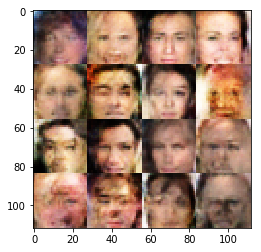

Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.5317... Generator Loss: 0.3375


In [23]:
batch_size = 48
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.